# DATASET REFERIDOS - MOTIVACIÓN Y AUDIENCIA
El dataset seleccionado para analizar, esta compuesto por los referidos de un Sistema que otorga Créditos Personales a una población que no sería aprobada para un préstamo en una entidad bancaria. 
  Los datos son analizados por un Motor de Riesgos que determinará si finalmente se consideran aptos para recibir una oferta o no (Los clientes aprobados serán identificados con la variable *approved* en *True*). Para saber si una persona puede optar o no por un crédito, la politica que se encuentra en el motor de decisión se basa en el análisis de distintos aspectos socioeconómicos de la persona, para luego asignarles a cada uno un puntaje o *score*.
  Este puntaje obtenido, sera pieza fundamental para determinar la decisión final; ya que de él depende la aprobación o el monto que se le otorgará al cliente. Los referidos, se agrupan por su nivel socioeconómico y su situación actual (Que muestra la mora que presenta un cliente con otras entidades) y es posible identificar si su género es masculino o femenino. Por otro lado, los montos máximos otorgados también dependerán del análisis de Riesgo mencionado anteriormente. Por ello, encontramos importante observar cómo se comporta el monto según situación actual, score, género y nivel socioeconómico; ya que esto nos permitirá atraer una mejor población para incrementar la otorgacion y disminuir la mora.
  En este caso, quisiéramos resolver las siguientes interrogantes:

*   ¿Cuál es el monto máximo otorgado? ¿Y el mínimo?
*   ¿Se otorgan más montos de mayor o de menor valor? ¿Existe una relación entre monto y cantidad de créditos otorgados?
* Comparando los referidos entre hombres y mujeres, ¿Existe una diferencia notable entre esta cantidad? ¿A quiénes se le otorgan mayores montos? ¿Qué cantidad de ellos son aprobados?
* En relación a la cantidad de referidos, ¿Qué porcentaje de ellos finalmente es aprobado?
* ¿Cuál es el grupo de Nivel Socioeconómico que posee mayor puntaje de Riesgo? ¿Existe una diferencia significativa entre los puntajes?




# PROBLEMA COMERCIAL
El número de referidos rechazados es muy alto y analizar estos casos genera una pérdida, puesto que se utilizan otras entidades para tomar la decisión final. Por este motivo, debemos buscar una mejor población tomando como referencia aquella que ha sido aprobada para obtener una mejor tasa de aprobación y disminuir los costos.


# PREGUNTAS/HIPÓTESIS
* ¿Cómo se puede identificar al sector de referidos aprobados? ¿Existe algún factor en común entre ellos?
* ¿Existe una diferencia en aprobados por su género?
* ¿Existe algún sector socioeconómico que se destaque por poseer mayor/menor número de aprobados?
* En base a los casos que analizamos diariamente, notamos que la mayoría de referidos aprobados son hombres en edades promedios entre 18 y 25 años.


# DEFINICIÓN DEL OBJETIVO
El objetivo principal de nuestro análisis es identificar los rasgos de los referidos que posiblemente serán aprobados por el motor para así poder tomar acciones por ej: campañas de publicidad para poder atraer a ese grupo poblacional.

# CONTEXTO COMERCIAL
En el sistema, los clientes pueden provenir de dos fuentes. Por un lado, se encuentran aquellos que inician una solicitud directamente desde la web y, por el otro se encuentran los Referidos. Estos últimos, son una fuente fundamental para el ingreso de clientes puesto que proveen información sobre clientes potenciales (podrán ser aprobados o rechazados).
En este caso, nos centraremos únicamente en el funcionamiento de los referidos. Por ello, es importante analizar los rasgos que identifican al sector que finalmente es apto para recibir un crédito. De esta manera, será posible presentar los resultados obtenidos a los Referidos y así poder tomar acciones preventivas para incrementar el número de referidos exitosos.

# CONTEXTO ANALÍTICO
El equipo de riesgos ha recibido datos sobre los últimos 2000 referidos recibidos el 30 de Agosto. Los mismos, identifican mediante la variable *approved* si han sido o no aprobados respectivamente. Debemos utilizar **modelos de agrupamiento** para abordar este problema de **aprendizaje no supervisado**.

# **Configuración de dataset y librerías**

In [ ]:
# IMPORTS
# Manejo de datos
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Modelar modelos
import statsmodels.api as sm
import statsmodels.formula.api as sf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generación de aleatorios
import random

# Análisis de machine learning
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Modeling 
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# CONFIGURACIONES Y FUNCIONES
mpl.style.use('bmh')

# URL Dataset
url = 'https://raw.githubusercontent.com/msolpierozzi/data-science-proyecto-final/master/REFERRAL_PERSONS.csv'

# Funciones
def deleteColumns(df, columns):
  for i in range(0, len(columns)):
    df.drop(columns[i], inplace=True, axis=1)

def countMissingDataByColumn(missing_data):
  for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

def readCsv(url):
  df = pd.read_csv(url, on_bad_lines='skip')
  return df

def describe(df):
  return df.describe()

def head(df):
  return df.head()

def groupBy(df, column):
  return df.groupby([column])

def index(df):
  return df.index

def isnull(df):
  return df.isnull()

def printLine(data):
  print("---------------------" + data + "---------------------")

def randomSampling(data, n):
    randomSample = []
    for i in range (0, n):
      randomSample.append(random.choice(data))
    return(randomSample)

def getElements(df, indexes):
  new_df= df.iloc[indexes, :]
  return new_df

def dropElements(df, indexes):
  new_df = df.drop(df.index[indexes])
  return new_df

def getNumCatCols(df):
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Columnas numéricas \n',num_cls)
    print(f'Columnas categóricas \n',cat_cls)
    
    return num_cls, cat_cls

def replaceValues(df, column, old, new):
  df.loc[df[column] == old, column] = new

Leer dataset y eliminar columnas no deseadas

In [ ]:
df = pd.read_csv(url, on_bad_lines='skip')

In [ ]:
printLine("IS NULL")
print(isnull(df))
printLine("")

printLine("DESCRIBE DATASET 1")
print(describe(df))
printLine("")

printLine("HEAD DATASET 1")
print(head(df))
printLine("")

printLine("INDEX")
print(index(df))
printLine("")

printLine("GROUP BY GENDER")
print(df.groupby("gender").agg({"max_amount": "mean"}))
printLine("")

printLine("GROUP BY CURRENT SITUATION")
print(df.groupby("current_situation").agg({"max_amount": ["mean", "sum"]}))
printLine("")

printLine("TOP 10 MAX AMOUNT")
print(df[["max_amount", "gender", "current_situation", "term", "created_at"]].sort_values(by="max_amount",ascending=False).head(10))
printLine("")

deleteColumns(df, ["birthday", "updated_at", "person_query_id", "id", "tries", "created_at", "informed", "approved", "min_term", "term"])

---------------------IS NULL---------------------
          id  gender  entity_code  person_query_id  approved  \
0      False   False        False            False     False   
1      False   False        False            False     False   
2      False   False        False            False     False   
3      False   False        False            False     False   
4      False   False        False            False     False   
...      ...     ...          ...              ...       ...   
49995  False   False        False            False     False   
49996  False   False        False            False     False   
49997  False   False        False            False     False   
49998  False   False        False            False     False   
49999  False   False        False            False     False   

       current_situation  score_risk  score_nosis  socioeconomic_level    cda  \
0                  False       False        False                False  False   
1                  

In [ ]:
df.columns

Index(['gender', 'entity_code', 'current_situation', 'score_risk',
       'score_nosis', 'socioeconomic_level', 'cda', 'rate', 'max_amount'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               50000 non-null  int64  
 1   entity_code          50000 non-null  int64  
 2   current_situation    50000 non-null  int64  
 3   score_risk           50000 non-null  float64
 4   score_nosis          50000 non-null  int64  
 5   socioeconomic_level  50000 non-null  object 
 6   cda                  50000 non-null  object 
 7   rate                 50000 non-null  int64  
 8   max_amount           50000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 3.4+ MB


In [ ]:
# Cantidad de aprobados por género
sp = df.gender.value_counts()
sp = pd.DataFrame(sp)
sp.T

,1,0
gender,28296,21704


# ¿Existe alguna diferencia entre los montos y la cantidad de aprobados por género?

# ¿Existe una relación entre la cantidad de aprobados por género? ¿Se otorgan más créditos a hombres o a mujeres?

([<matplotlib.patches.Wedge at 0x7f1f91d2e580>,
 [Text(0.22617830800261424, 1.076495876902961, 'Femenino'),
  Text(-0.22617830800261435, -1.076495876902961, 'Masculino')],
 [Text(0.1233699861832441, 0.5871795692197969, '43.4 %'),
  Text(-0.12336998618324417, -0.5871795692197967, '56.6 %')])

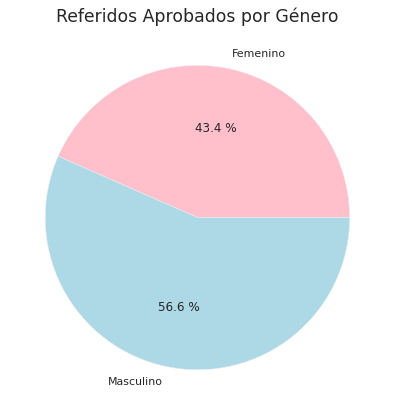

In [ ]:
# Gráfico 2: Pie de aprobados por Género
approvedF = df.query("gender == 0")
approvedM = df.query("gender == 1")
approvedByGender = [len(approvedF.index), len(approvedM.index)]
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('Referidos Aprobados por Género')
ax.pie(approvedByGender, labels = ['Femenino', 'Masculino'], colors=['pink', 'lightblue'], autopct="%0.1f %%")

A partir del gráfico obtenido, podemos afirmar que los aprobados en su mayoría son hombres, superando casi en un 20% al porcentaje femenino.


# ¿A quiénes se le otorgan mayores montos? 

---



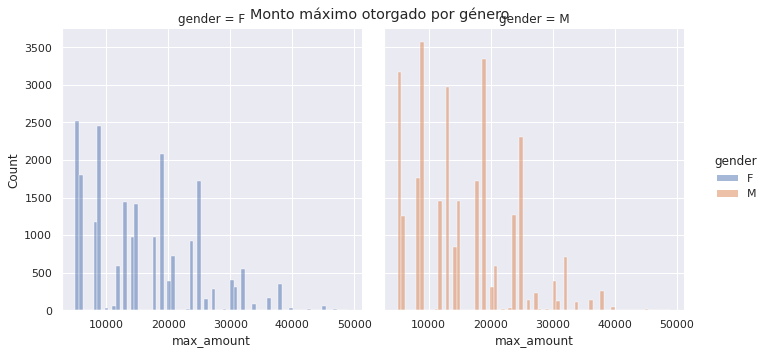

In [ ]:
##### SEABORN ##############
df.loc[df['gender'] == 0, 'gender'] = 'F'
df.loc[df['gender'] == 1, 'gender'] = 'M'

df_sin_nulls = df.dropna()
max_amounts = df_sin_nulls[["max_amount", "gender"]]
sns.set()

# GRÁFICO 1: Gráfico de barras de Monto máximo dividido por género
g1 = sns.displot(data=max_amounts, x="max_amount", hue="gender", col="gender")
g1.fig.suptitle('Monto máximo otorgado por género')
plt.show()

Se les otorgan mayores montos a los hombres que a las mujeres, siendo la cantidad más otorgada de 10.000 en hombres y 5000 en mujeres.

# **¿El puntaje de riesgo varía según el nivel socioeconómico?**



<BarContainer object of 50000 artists>

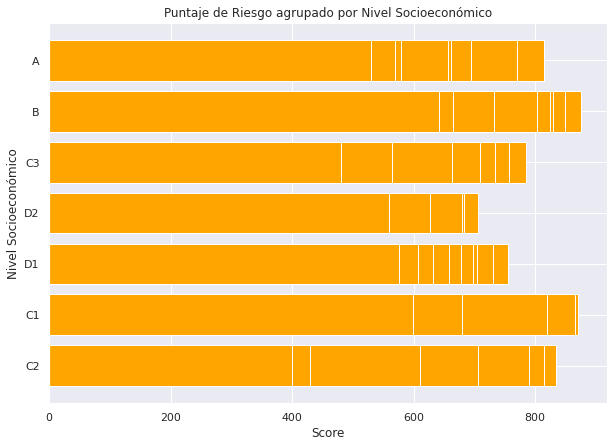

In [ ]:
#Gráfico 2: Gráfico de barras de puntaje de Risk por Nivel Socioeconómico
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('Puntaje de Riesgo agrupado por Nivel Socioeconómico')
ax.set_xlabel('Score')
ax.set_ylabel('Nivel Socioeconómico')
ax.barh(df_sin_nulls.socioeconomic_level, df_sin_nulls.score_risk, color=['orange'])

Podemos observar que no existe una variación muy marcada entre el score otorgado por el motor de riesgo en cuanto al nivel socioeconómico de la persona. Por otro lado, el nivel que más puntaje obtuvo es el Nivel Socioeconómico C1, casi a la par del nivel B que corresponde a profesionales independientes mientras que la clase A representan a la clase socioeconómica más alta dentro de nuestro problema.


In [ ]:
df.corr()

,entity_code,current_situation,score_risk,score_nosis,rate,max_amount
entity_code,1.000000,0.036682,0.384299,-0.047177,-0.064387,0.154717
current_situation,0.036682,1.000000,-0.174137,-0.340886,-0.356036,-0.042449
score_risk,0.384299,-0.174137,1.000000,0.351586,0.287419,0.736675
score_nosis,-0.047177,-0.340886,0.351586,1.000000,0.307486,0.207645
rate,-0.064387,-0.356036,0.287419,0.307486,1.000000,0.317582
max_amount,0.154717,-0.042449,0.736675,0.207645,0.317582,1.000000


<AxesSubplot:>

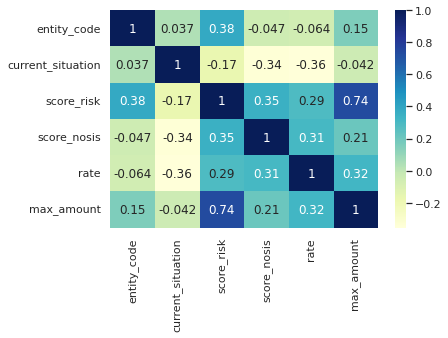

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

Los valores en la gráfica más cercanos a 1 corresponden a dos features que se encuentran correlacionadas, por lo que debemos eliminar una de ellas.
En este caso, podemos observar que las columnas *score_risk* y *max_amount* se encuentran en esta situación. Para nuestro análisis, no es indispensable conocer el monto máximo otorgado puesto que nuestro objetivo es incrementar los clientes aprobados independientemente del monto. Por este motivo, optamos por eliminar la columna *max_amount* del análisis.

In [ ]:
deleteColumns(df, ["max_amount"])
df.head()

,gender,entity_code,current_situation,score_risk,score_nosis,socioeconomic_level,cda,rate
0,F,386,1,482.50,1,C2,Aprobado,1000
1,F,72,2,476.25,1,C1,Aprobado,1000
2,M,72,5,437.50,1,C1,Aprobado,107
3,M,17,1,453.75,570,C2,Aprobado,1000
4,F,20,2,520.00,1,D1,Aprobado,107


Volvemos a graficar las correlaciones

<AxesSubplot:>

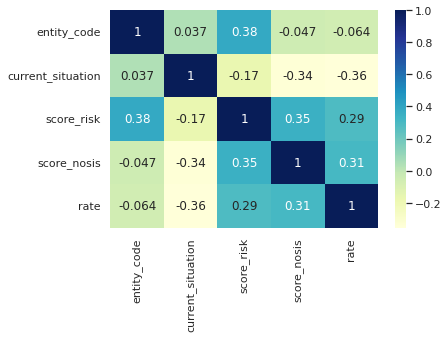

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

Con la columna *max_amount* eliminada, podemos afirmar que los demás valores no de la tabla no resultarán un "riesgo" para el modelo puesto que se encuentran lejanos al valor 1

**Gráficos en base a la columna socioeconomic_level**



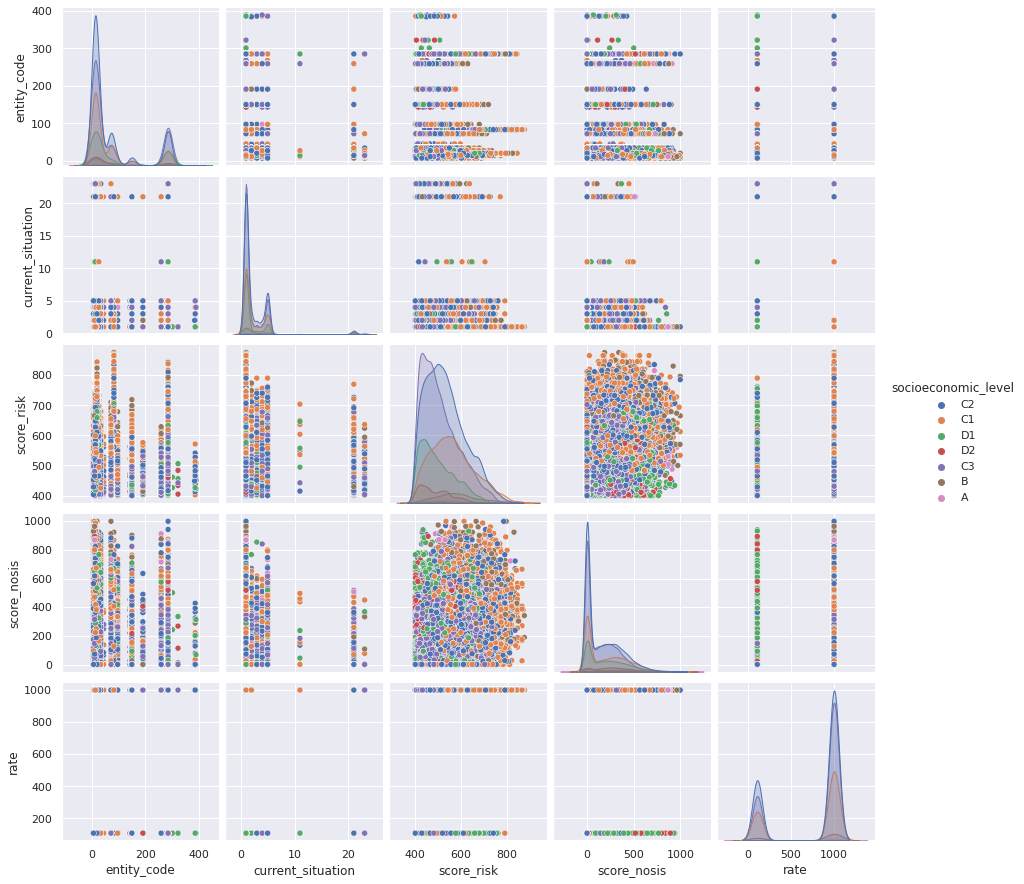

In [ ]:
g = sns.pairplot(df, kind='scatter', hue='socioeconomic_level')

Seleccionamos las variables más representativas para hacer el gráfico más específico

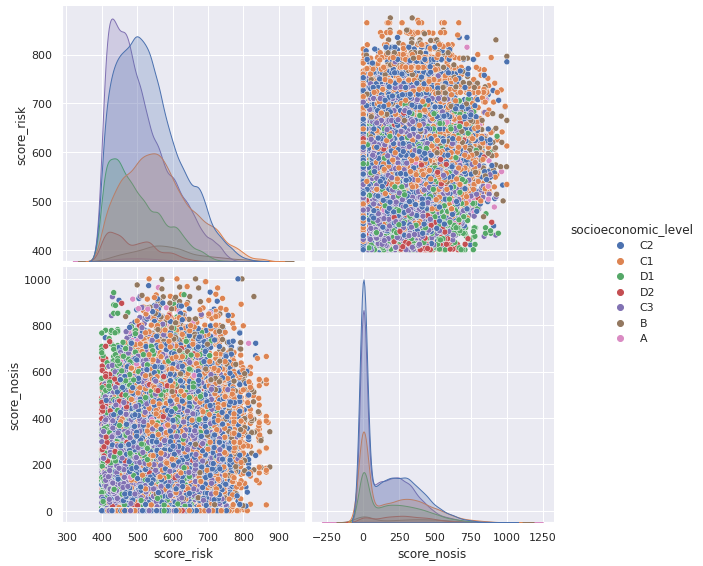

In [ ]:
sns.pairplot(df, hue='socioeconomic_level',height=4,vars=["score_risk","score_nosis"],kind='scatter')

##ELEGIR UN MÉTODO DE FEATURE ENG PARA REDUCIR LA DIMENSIONALIDAD DEL DATASET
 1. Transformar variables categóricas a variables numéricas.
  - Utilizamos ***Label Encoder*** para identificar las variables categóricas 
 con un número
  - Manejaremos los datos faltantes.

2. Realizar Data Sampling


In [ ]:
df.socioeconomic_level.value_counts()

C2    17288
C3    14686
C1     9199
D1     5887
D2     1516
B      1223
A       201
Name: socioeconomic_level, dtype: int64

Podemos observar que, C1 que corresponde a los niveles más altos de risk, se encuentra entre uno de los más habituales. Por otro lado, B, que le sigue en puntaje, corresponde a una minoría con respecto al total analizado de 50.000 registros.

# Reemplazo de variables
* Reemplazamos las variables categóricas
* Actualizamos los valores no definidos por 0
* Asignamos puntajes a la variable socieconomic_level para un mejor análisis
* Generamos nuevas columnas a partir del manejo de la data existente

In [ ]:
replaceValues(df, 'socioeconomic_level', 'A', 1)
replaceValues(df, 'socioeconomic_level', 'B', 2)
replaceValues(df, 'socioeconomic_level', 'C1', 3)
replaceValues(df, 'socioeconomic_level', 'C2', 4)
replaceValues(df, 'socioeconomic_level', 'C3', 5)
replaceValues(df, 'socioeconomic_level', 'D1', 6)
replaceValues(df, 'socioeconomic_level', 'D2', 7)

replaceValues(df, 'cda', 'Aprobado', 1)
replaceValues(df, 'cda', 'Observado', 2)

replaceValues(df, 'gender', 'F', 0)
replaceValues(df, 'gender', 'M', 1)

#AGREGAR COLUMNAS
df['score_risk_more_than_500'] = df.apply(lambda x: 1 if int(x["score_risk"]) > 500 else 0, axis=1)
df['best_socioeconomic_levels'] = df.apply(lambda x: 1 if (x["socioeconomic_level"] == 2 or x["socioeconomic_level"] == 3) else 0, axis=1)
df['worst_socioeconomic_level'] = df.apply(lambda x: 1 if (x["socioeconomic_level"] == 7) else 0, axis=1)

#ELIMINAMOS COLUMNAS MENOS IMPORTANTES
deleteColumns(df, ["cda", "gender", "score_nosis"])
df = df.fillna(0)
df.head()

,entity_code,current_situation,score_risk,socioeconomic_level,rate,score_risk_more_than_500,best_socioeconomic_levels,worst_socioeconomic_level
0,386,1,482.50,4,1000,0,0,0
1,72,2,476.25,3,1000,0,1,0
2,72,5,437.50,3,107,0,1,0
3,17,1,453.75,4,1000,0,0,0
4,20,2,520.00,6,107,1,0,0


Nuevas columnas: 


*   *score_risk_more_than_500*: Clasificamos con 1 a los individuos que tienen un score de risk mayor a 500 y con 0 a los que no.
*   *best_socioeconomic_levels*: Asignamos 1 a los que poseen nivel socioeconómico 1 o 2 (Nivel correspondiente a los niveles A y B), y 0 al resto.
* *worst_socioeconomic_level*: Asignamos 1 a los que poseen nivel socieconómico 7 (D2), y 0 al resto.



# DATA SAMPLING

In [ ]:
n = 2000
npArr = df.to_numpy()
print(list(npArr).count)
randomSample = randomSampling(npArr, n)
dfSample = pd.DataFrame(randomSample)
dfSample.columns = df.columns

print(dfSample.head())
print(dfSample.describe())

<built-in method count of list object at 0x7f1f74829ac0>
   entity_code  current_situation  score_risk  socioeconomic_level    rate  \
0        285.0                1.0      548.75                  5.0  1000.0   
1         27.0                5.0      415.00                  6.0   107.0   
2        150.0               21.0      411.25                  4.0  1000.0   
3         27.0                1.0      632.50                  5.0  1000.0   
4        150.0                5.0      460.00                  4.0   107.0   

   score_risk_more_than_500  best_socioeconomic_levels  \
0                       1.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       1.0                        0.0   
4                       0.0                        0.0   

   worst_socioeconomic_level  
0                        0.0  
1                        0.0  
2                        0.0  
3

##ELEGIR UN ALGORITMO DE CLASIFICACIÓN O REGRESIÓN PARA ENTRENAR LOS DATOS
Algoritmo de clasificación: CLUSTERING No jerárquico - K-Means.
Su función es encontrar una estructura o un patrón en una colección de datos no clasificados.
Se utilizan en el aprendizaje no supervisado, y sirven para categorizar datos no etiquetados, es decir, datos sin categorías o grupos definidos.
El algoritmo funciona mediante la búsqueda de grupos dentro de los datos, con el número de grupos representados por la variable K. Funciona de manera iterativa para asignar cada punto de datos a uno de los K grupos según las características proporcionadas.

     entity_code  current_situation  score_risk  socioeconomic_level  rate  \
26            20                  1      678.75                    6   107   
10            17                  5      413.75                    6   107   
176           20                  1      698.75                    3  1000   

     score_risk_more_than_500  best_socioeconomic_levels  \
26                          1                          0   
10                          0                          0   
176                         1                          1   

     worst_socioeconomic_level  
26                           0  
10                           0  
176                          0  


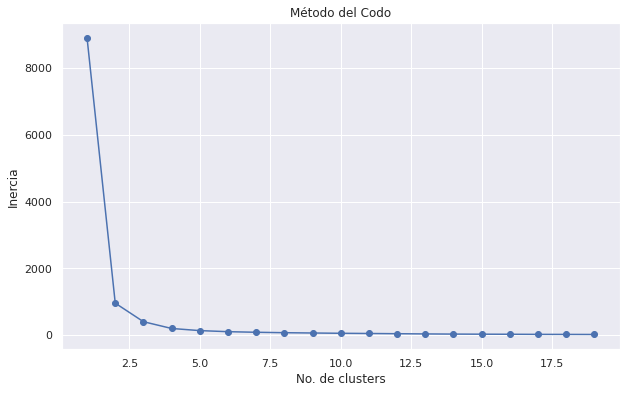

In [ ]:
### DATOS DE MUESTRA ###
# Se selecionan unos datos al azar para posteriormente verificar el clúster 
# al que pertenecen
indexes = [26, 10, 176]

muestras = getElements(df, indexes)
data = dropElements(df, indexes)

print(muestras)

dataEscalada = preprocessing.Normalizer().fit_transform(data)
muestrasEscalada = preprocessing.Normalizer().fit_transform(muestras)

### ANÁLISIS DE MACHINE LEARNING ###
# Se determina las variables a evaluar
x = dataEscalada.copy()

## Hallar el valor óptimo de K ##
# Se aplicará el método de codo para hallar K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(x)
    # Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

# Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 0
Muestra 2 se encuentra en el clúster: 4


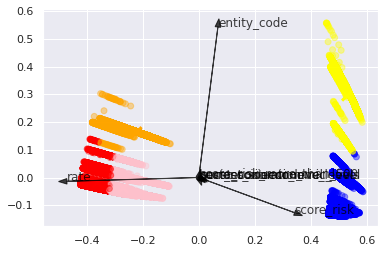

In [ ]:
## Se aplica el algoritmo de clustering ##
# Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)

# Se entrena el algoritmo
algoritmo.fit(x)

# Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

# Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestrasEscalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(x)
pca = modelo_pca.transform(x) 

# Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'yellow', 'orange', 'pink']

# Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

# Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, marker = 'o',alpha = 0.4)

# Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker = 'x', s = 100, linewidths = 3, c = colores)

# Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

# Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    # Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    # Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()

# CÁLCULO DE MÉTRICAS PARA VALIDAR EL MODELO

In [ ]:
sns.set_style('whitegrid')

data = df
data.head()

# Definimos matriz de diseño X y vector respuesta y
x = df
y = abs(pd.Series(data['socioeconomic_level'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(xTrain, yTrain)
# Obtenemos las predicciones del modelo con X_test
xTestPred = modelo.predict(xTest) 

print("SOCIOECONOMIC_LEVEL")
print(classification_report(y_pred = xTestPred, y_true = yTest))

SOCIOECONOMIC_LEVEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00      1867
           3       1.00      1.00      1.00      3449
           4       1.00      1.00      1.00      2856
           5       1.00      1.00      1.00      1212
           6       1.00      1.00      1.00       320

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
modelo.feature_importances_

array([0.00709313, 0.02966564, 0.01459468, 0.66242973, 0.06029913,
       0.00466526, 0.18011105, 0.04114138])

In [ ]:
len(modelo.feature_importances_)

8

In [ ]:
len(xTrain.columns)

8

In [ ]:
# Chi-square
# Perform chi2 test
from sklearn.feature_selection import chi2
# Calculating Fscore and p value
fPValues=chi2(xTrain, yTrain)
fPValues

(array([5.08248126e+04, 1.46868850e+03, 4.16049092e+04, 1.10300145e+04,
        3.22169579e+06, 8.97764991e+02, 3.16940000e+04, 3.88040000e+04]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.14282443e-190, 0.00000000e+000, 0.00000000e+000]))

Cuanto mayor sea el valor de la puntuación F y cuanto menor sea el valor del valor p, más importante será el feature.
El primer array corresponde a los valores de F mientras que el segundo a los de p

In [ ]:
# Representación en forma de lista de P
pValues=pd.Series(fPValues[1])
pValues.index = xTrain.columns
pValues

entity_code                   0.000000e+00
current_situation             0.000000e+00
score_risk                    0.000000e+00
socioeconomic_level           0.000000e+00
rate                          0.000000e+00
score_risk_more_than_500     1.142824e-190
best_socioeconomic_levels     0.000000e+00
worst_socioeconomic_level     0.000000e+00
dtype: float64

In [ ]:
# Lista ordenada
pValues.sort_index(ascending=False)

worst_socioeconomic_level     0.000000e+00
socioeconomic_level           0.000000e+00
score_risk_more_than_500     1.142824e-190
score_risk                    0.000000e+00
rate                          0.000000e+00
entity_code                   0.000000e+00
current_situation             0.000000e+00
best_socioeconomic_levels     0.000000e+00
dtype: float64

A partir de este análisis, podemos concluir que worst_socioeconomic_level y socioeconomic_level son las features más importante. Como habíamos deducido con anterioridad, esta columna es determinante puesto que según el nivel socioeconómico de la persona, se decidirá si es apta o no para recibir un crédito.

In [ ]:
# Importing mutual information gain
from sklearn.feature_selection import mutual_info_classif
# Determine the mutual information
mutualInfo = mutual_info_classif(xTrain, yTrain)
mutualInfo

array([0.02505896, 0.01823811, 0.21885927, 1.50874482, 0.16703731,
       0.02527794, 0.51191826, 0.13601602])

In [ ]:
# Representing in list form
mutualInfo = pd.Series(mutualInfo)
mutualInfo.index = xTrain.columns
mutualInfo.sort_values(ascending=False)

socioeconomic_level          1.508745
best_socioeconomic_levels    0.511918
score_risk                   0.218859
rate                         0.167037
worst_socioeconomic_level    0.136016
score_risk_more_than_500     0.025278
entity_code                  0.025059
current_situation            0.018238
dtype: float64

<AxesSubplot:>

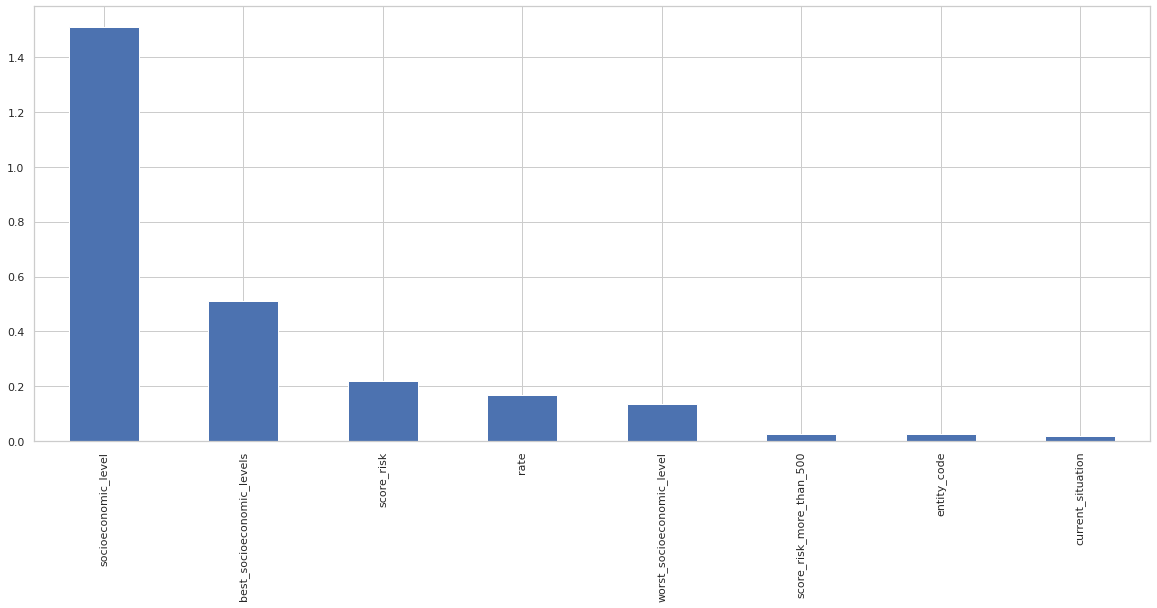

In [ ]:
# Plotting the graph
# Plot the ordered mutual_info values per feature
mutualInfo.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree, linear_model

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

Fold:1, Train set: 40000, Test set:10000
Fold:2, Train set: 40000, Test set:10000
Fold:3, Train set: 40000, Test set:10000
Fold:4, Train set: 40000, Test set:10000
Fold:5, Train set: 40000, Test set:10000


In [ ]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [ ]:
score = cross_val_score(RandomForestClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), x, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.639
Average score(2): 0.941
Average score(3): 0.996
Average score(4): 1.000
Average score(5): 1.000
Average score(6): 1.000
Average score(7): 1.000
Average score(8): 1.000
Average score(9): 1.000
Average score(10): 1.000


In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators= val, random_state= 42), x, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 1.000
Average score(100): 1.000
Average score(150): 1.000
Average score(200): 1.000
Average score(250): 1.000
Average score(300): 1.000
Average score(350): 1.000


Seleccionamos las 5 mejores features para analizar

In [ ]:
# Selección de las 5 features
from sklearn.feature_selection import SelectKBest

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(xTrain, yTrain)
xTrain.columns[sel_five_cols.get_support()]

Index(['score_risk', 'socioeconomic_level', 'rate',
       'best_socioeconomic_levels', 'worst_socioeconomic_level'],
      dtype='object')

Identificar las columnas non-null y el tipo de dato de cada una del df xTrain


In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 18165 to 33003
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   entity_code                40000 non-null  int64  
 1   current_situation          40000 non-null  int64  
 2   score_risk                 40000 non-null  float64
 3   socioeconomic_level        40000 non-null  int64  
 4   rate                       40000 non-null  int64  
 5   score_risk_more_than_500   40000 non-null  int64  
 6   best_socioeconomic_levels  40000 non-null  int64  
 7   worst_socioeconomic_level  40000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.7 MB


In [ ]:
numCols, catCols = getNumCatCols(xTrain)

Columnas numéricas 
 ['entity_code', 'current_situation', 'score_risk', 'socioeconomic_level', 'rate', 'score_risk_more_than_500', 'best_socioeconomic_levels', 'worst_socioeconomic_level']
Columnas categóricas 
 []


In [ ]:
# Estadísticas descriptivas para las columnas numéricas
xTrain[numCols].describe()

,entity_code,current_situation,score_risk,socioeconomic_level,rate,score_risk_more_than_500,best_socioeconomic_levels,worst_socioeconomic_level
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000
mean,75.119325,2.216625,525.796550,4.375650,662.021825,0.547150,0.20765,0.029900
std,101.966373,2.723919,87.529715,1.098461,433.116559,0.497778,0.40563,0.170314
min,7.000000,1.000000,400.000000,1.000000,107.000000,0.000000,0.00000,0.000000
25%,11.000000,1.000000,455.000000,4.000000,107.000000,0.000000,0.00000,0.000000
50%,17.000000,1.000000,511.250000,4.000000,1000.000000,1.000000,0.00000,0.000000
75%,72.000000,3.000000,581.250000,5.000000,1000.000000,1.000000,0.00000,0.000000
max,389.000000,23.000000,875.000000,7.000000,1000.000000,1.000000,1.00000,1.000000


In [ ]:
# Asegurarse de que no haya valores null
xTrain.isnull().sum()

entity_code                  0
current_situation            0
score_risk                   0
socioeconomic_level          0
rate                         0
score_risk_more_than_500     0
best_socioeconomic_levels    0
worst_socioeconomic_level    0
dtype: int64

In [ ]:
xTest.isnull().sum()

entity_code                  0
current_situation            0
score_risk                   0
socioeconomic_level          0
rate                         0
score_risk_more_than_500     0
best_socioeconomic_levels    0
worst_socioeconomic_level    0
dtype: int64

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = xTrain.corr().abs()
corr_matrix.head()

,entity_code,current_situation,score_risk,socioeconomic_level,rate,score_risk_more_than_500,best_socioeconomic_levels,worst_socioeconomic_level
entity_code,1.000000,0.034443,0.383970,0.076924,0.062338,0.289093,0.048195,0.004048
current_situation,0.034443,1.000000,0.171953,0.087607,0.357155,0.146401,0.038776,0.078414
score_risk,0.383970,0.171953,1.000000,0.255689,0.285554,0.787433,0.217106,0.079757
socioeconomic_level,0.076924,0.087607,0.255689,1.000000,0.344579,0.210483,0.695766,0.419440
rate,0.062338,0.357155,0.285554,0.344579,1.000000,0.245244,0.092463,0.224977


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

,entity_code,current_situation,score_risk,socioeconomic_level,rate,score_risk_more_than_500,best_socioeconomic_levels,worst_socioeconomic_level
entity_code,NaN,0.034443,0.383970,0.076924,0.062338,0.289093,0.048195,0.004048
current_situation,NaN,NaN,0.171953,0.087607,0.357155,0.146401,0.038776,0.078414
score_risk,NaN,NaN,NaN,0.255689,0.285554,0.787433,0.217106,0.079757
socioeconomic_level,NaN,NaN,NaN,NaN,0.344579,0.210483,0.695766,0.419440
rate,NaN,NaN,NaN,NaN,NaN,0.245244,0.092463,0.224977


In [ ]:
# Select columns with correlations above threshold
toDrop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Hay %d columnas a eliminar.' % (len(toDrop)))

Hay 0 columnas a eliminar.


In [ ]:
# Drop Correlated Variables
train = xTrain.drop(columns = toDrop)
test = xTest.drop(columns = toDrop)

print('Training shape: ', xTrain.shape)
print('Testing shape: ', xTest.shape)

Training shape:  (40000, 8)
Testing shape:  (10000, 8)


In [ ]:
# Eliminar Missing Values
# Porcentaje de Missing Values en xTrain
trainMissing = (xTrain.isnull().sum() / len(xTrain)).sort_values(ascending = False)
trainMissing.head()

entity_code            0.0
current_situation      0.0
score_risk             0.0
socioeconomic_level    0.0
rate                   0.0
dtype: float64

In [ ]:
# Porcentaje de Missing Values en xTest
testMissing = (xTest.isnull().sum() / len(xTest)).sort_values(ascending = False)
testMissing.head()

entity_code            0.0
current_situation      0.0
score_risk             0.0
socioeconomic_level    0.0
rate                   0.0
dtype: float64

In [ ]:
# Identificar valores perdidos por encima del umbral
trainMissing = trainMissing.index[trainMissing > 0.75]
testMissing = testMissing.index[testMissing > 0.75]

allMissing = list(set(set(trainMissing) | set(testMissing)))
print('Hay %d columnas con más del 75%% de valores missing' % len(allMissing))

Hay 0 columnas con más del 75% de valores missing


<BarContainer object of 8 artists>

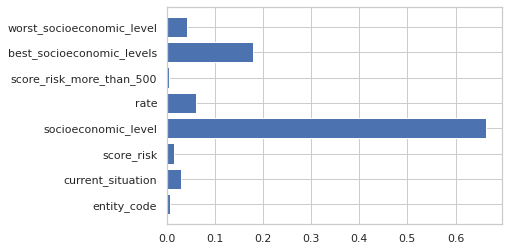

In [ ]:
plt.barh(xTrain.columns, modelo.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

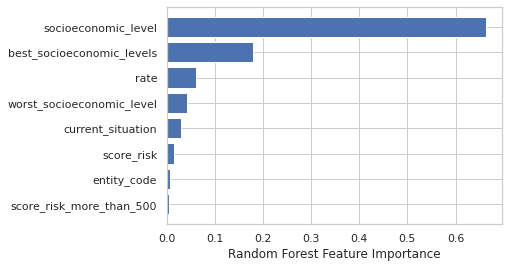

In [ ]:
sorted_idx = modelo.feature_importances_.argsort()
plt.barh(xTrain.columns[sorted_idx], modelo.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

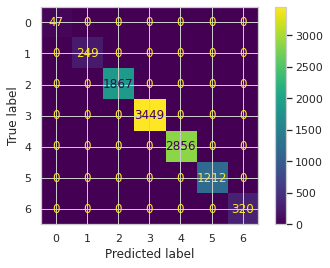

In [ ]:
cm = confusion_matrix(yTest, xTestPred, labels= modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= modelo.classes_)
disp.plot()
plt.show()

## CONCLUSIONES


*   Identificamos cuáles son los features más importantes (score_risk, socioeconomic_level, rate, best_socioeconomic_levels, worst_socioeconomic_level)
*   Identificamos cuáles columnas poseían correlaciones altas y decidimos eliminar la columna más afectada: max_amount. De esta manera, logramos observar un cambio positivo en el gráfico de correlaciones.
* Observamos que tanto xTest como xTrain no poseen valores no deseados como missing_values o valores no numéricos.
* En cuanto al análisis de género, no encontramos diferencias muy marcadas, por lo que descartamos la hipótesis inicial de que se aprueban más ofertas del género masculino. Sin embargo, los montos otorgados sí son mayores.
* Concluimos en que la  variable que más influye en la aprobación es el nivel socioeconómico, puesto que los que poseen niveles más altos son los más aprobados. Por lo que se podría aplicar en futuro una estrategia de marketing para atraer a ese sector, con el objetivo de mejorar las ventas.
* Decidimos utilizar clustering (K-means) para identificar a los distintos grupos.
